In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pd_pums_real = pd.read_csv("datasets/PUMS.csv")
pd_pums_real.drop('pid', axis=1, inplace=True)
pd_pums_real.drop('income', axis=1, inplace=True)

pd_pums_fake = pd.read_csv("datasets/mwem_PUMS.csv")

pums_real = pd_pums_real.to_numpy()

pums_fake = pd_pums_fake.to_numpy()

x,y = pums_real[:,0], pums_real[:,2]
plt.scatter(x,y)
plt.show()

x,y = pums_fake[:,0], pums_fake[:,2]
plt.scatter(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

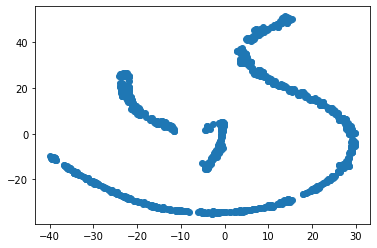

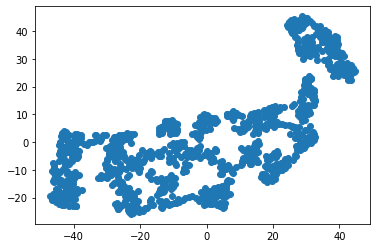

In [2]:
embedding_1 = TSNE(n_components=2).fit_transform(pums_real)

x,y = embedding_1.T
plt.scatter(x,y)
plt.show()

embedding_2 = TSNE(n_components=2).fit_transform(pums_fake)

x,y = embedding_2.T
plt.scatter(x,y)
plt.show()

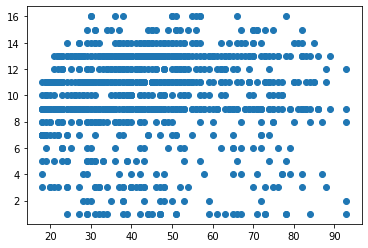

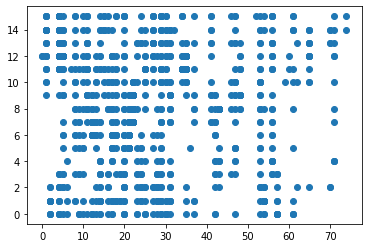

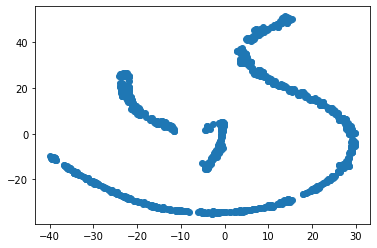

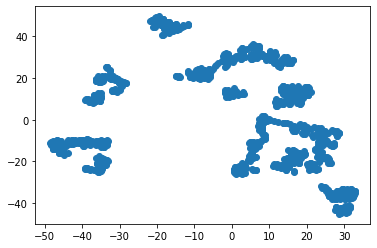

In [3]:
pd_pums_less_fake = pd.read_csv("datasets/mwem_PUMS_less_private.csv")

pums_less_fake = pd_pums_less_fake.to_numpy()

x,y = pums_real[:,0], pums_real[:,2]
plt.scatter(x,y)
plt.show()

x,y = pums_less_fake[:,0], pums_less_fake[:,2]
plt.scatter(x,y)
plt.show()

x,y = embedding_1.T
plt.scatter(x,y)
plt.show()

embedding_3 = TSNE(n_components=2).fit_transform(pums_less_fake)

x,y = embedding_3.T
plt.scatter(x,y)
plt.show()

In [5]:
print(pd_pums_real.describe())
print(pd_pums_fake.describe())
print(pd_pums_less_fake.describe())

age          sex         educ         race        income  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.00000   
mean     44.797000     0.514000     9.888000     1.954000   34380.08400   
std      17.745385     0.500054     3.415424     1.155517   51491.28621   
min      18.000000     0.000000     1.000000     1.000000       0.00000   
25%      31.000000     0.000000     9.000000     1.000000    6500.00000   
50%      42.000000     1.000000    11.000000     1.000000   19150.00000   
75%      55.000000     1.000000    13.000000     3.000000   41075.00000   
max      93.000000     1.000000    16.000000     6.000000  420500.00000   

           married          pid  
count  1000.000000  1000.000000  
mean      0.549000   500.500000  
std       0.497842   288.819436  
min       0.000000     1.000000  
25%       0.000000   250.750000  
50%       1.000000   500.500000  
75%       1.000000   750.250000  
max       1.000000  1000.000000  
               age          sex  

In [4]:
import datacompy

comp = datacompy.Compare(
    pd_pums_real,
    pd_pums_fake,
    df1_name='Real', #Optional, defaults to 'df1'
    df2_name='Fake', #Optional, defaults to 'df2'
    on_index=True
)

print(comp.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0  Original        7  1000
1       New        5  1000

Column Summary
--------------

Number of columns in common: 5
Number of columns in Original but not in New: 2
Number of columns in New but not in Original: 0

Row Summary
-----------

Matched on: index
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 1,000
Number of rows in Original but not in New: 0
Number of rows in New but not in Original: 0

Number of rows with some compared columns unequal: 1,000
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 5
Number of columns compared with all values equal: 0
Total number of values which compare unequal: 3,716

Columns with Unequal Values or Types
------------------------------------

    Column Original dtype New dtype  # Unequal  Max Di